In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

KeyboardInterrupt: 

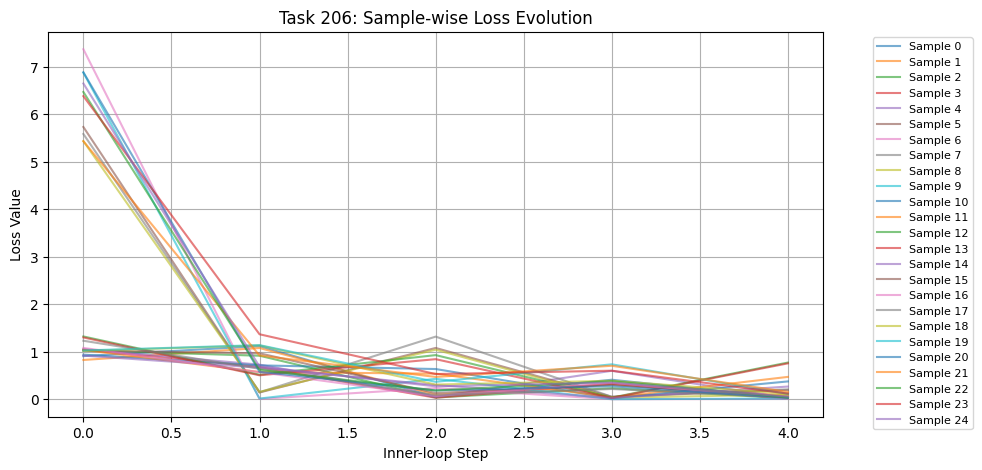

In [4]:
# CSV 파일 로드

setting = 'MAML'
if setting == 'MAML':
    file_path = "Loss_per_Sample/sample_loss_log_MAML(miniImageNet_1shot).csv" 
    original_save_path = "Loss_per_Sample/MAML"
elif setting == 'Arbiter':
     CSV 파일 로드
    file_path = "Loss_per_Sample/sample_loss_log_Arbiter(miniImageNet_1shot).csv" 
    original_save_path = "Loss_per_Sample/Arbiter"
else:
    print("error")

df = pd.read_csv(file_path)

# 저장할 폴더가 존재하는지 확인하고 없으면 생성
os.makedirs(original_save_path, exist_ok=True)

# Task 목록 가져오기
task_list = df["Task_Idx"].unique()

# 그래프 생성 및 저장
for task in task_list:
    plt.figure(figsize=(10, 5))

    # 특정 Task의 데이터 필터링
    task_data = df[df["Task_Idx"] == task]

    # 각 Sample별로 Loss 변화 플로팅
    for sample_id in task_data["Sample_Index"].unique():
        sample_data = task_data[task_data["Sample_Index"] == sample_id]
        plt.plot(sample_data["Step"], sample_data["Loss"], label=f"Sample {sample_id}", alpha=0.6)

    plt.xlabel("Inner-loop Step")
    plt.ylabel("Loss Value")
    plt.title(f"Task {task}: Sample-wise Loss Evolution")
    plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1), fontsize=8)
    plt.grid(True)

    # 그래프 저장 (예: Task_1_Loss.png, Task_2_Loss.png ...)
    plt.savefig(f"{original_save_path}/Task_{task}_Loss.png", dpi=300, bbox_inches="tight")
    plt.close()

print("모든 Task별 Loss 변화 그래프가 저장되었습니다!")
